In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv('./input/lending-club-loan-data/clean_loan.csv', low_memory=False)
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,0,200001,20000,20000,20000.0,60 months,12.73,452.31,B,B5,...,0.0,0.0,0.0,17100.0,7428.0,13500.0,0.0,N,Cash,N
1,1,200002,10000,10000,9725.0,36 months,12.73,335.65,B,B5,...,1.0,0.0,0.0,26394.0,17904.0,11000.0,15394.0,N,Cash,N
2,2,200003,40000,40000,40000.0,36 months,8.46,1261.97,A,A5,...,2.0,0.0,0.0,376496.0,75188.0,60400.0,77310.0,N,Cash,N
3,3,200004,5000,5000,5000.0,36 months,6.67,153.64,A,A2,...,1.0,0.0,0.0,44644.0,13269.0,15300.0,14244.0,N,Cash,N
4,4,200005,14000,14000,14000.0,36 months,8.46,441.69,A,A5,...,0.0,0.0,0.0,19400.0,12902.0,8100.0,10000.0,N,Cash,N


In [37]:
data.dtypes

Unnamed: 0                      int64
Unnamed: 0.1                    int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                       int64
total_acc   

In [140]:
def plot_feature_distplot(df, feature1):
    sns.distplot(df[feature1], hist=True, label=feature1)
    plt.legend()
    plt.show()

## Loan Amount Analysis

### Observations
    Loan requested, Loan funded and amount invested by investors is nearly same.

Median of loan amount is  13775.0


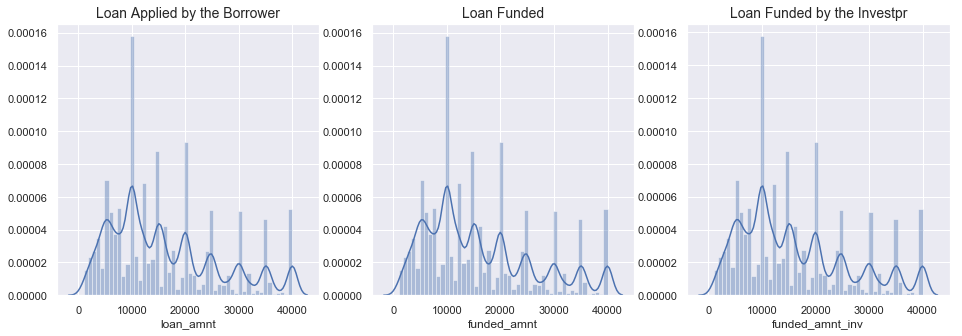

In [172]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(data['loan_amnt'], ax=ax[0], label='loan_amnt')
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(data['funded_amnt'], ax=ax[1],  label='loan_amnt')
ax[1].set_title("Loan Funded", fontsize=14)
sns.distplot(data['funded_amnt_inv'], ax=ax[2],  label='loan_amnt')
ax[2].set_title("Loan Funded by the Investpr", fontsize=14)

print ('Median of loan amount is ', np.median(data['loan_amnt']))

In [177]:
data["loan_status"].value_counts()

Current               172604
Fully Paid             18652
Late (31-120 days)      3417
Charged Off             3400
In Grace Period         1279
Late (16-30 days)        638
Default                    9
Name: loan_status, dtype: int64

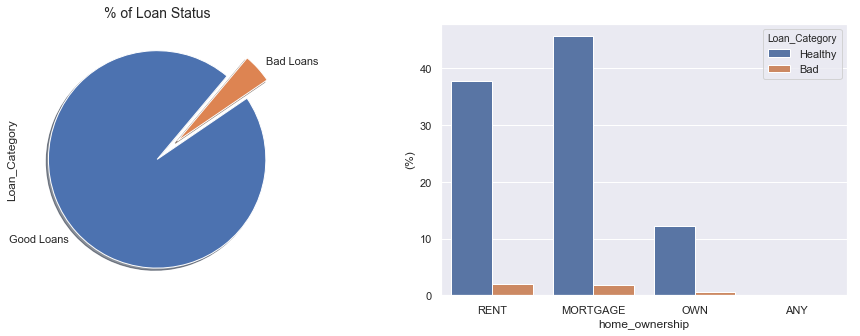

In [251]:
good_loans = ['Fully Paid','Current']

def good_or_bad_loan(loan_status):
    if loan_status in good_loans:
        return 'Healthy'
    else :
        return 'Bad'
        
data["Loan_Category"] = data['loan_status'].apply(good_or_bad_loan)

fig, ax = plt.subplots(1, 2, figsize=(16,5))
labels ="Good Loans", "Bad Loans"

ax[0].set_title("% of Loan Status", fontsize=14)
data["Loan_Category"].value_counts().plot.pie(explode=[0,0.25],labels=labels, shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="home_ownership", y="loan_amnt", hue="Loan_Category", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

plt.show()

## Interest Rate Analysis

#### Observation 1: Most Interest rates are <15%, howevere a small percentage of loands is at a very higher interest rate

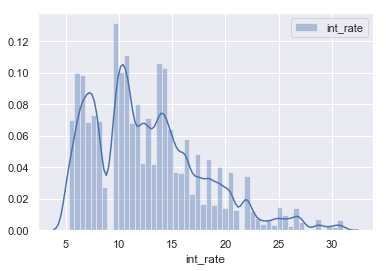

<Figure size 3600x3600 with 0 Axes>

In [90]:
plot_feature_distplot(data, 'int_rate')
data_int_rates_gt_15 = data.loc[data['int_rate']>15]
data_int_rates_lt_15 = data.loc[data['int_rate']<15]

#### Relation B/w Interest Rates & Loan Amount

    For low interest rates the median loan amount is 13k for high interest rates the median loan is high.
    For low interest rates the median annual income is 68k for high interest rates the annual income is 60K

In [218]:
print ('Median of loan account where interest rates is <15%', np.median(data_int_rates_lt_15['loan_amnt']))
print ('Median of loan account where interest rates is >15%', np.median(data_int_rates_gt_15['loan_amnt']))
print ('\nMedian of loan account where interest rates is <15%', np.median(data_int_rates_lt_15['annual_inc']))
print ('Median of loan account where interest rates is >15%', np.median(data_int_rates_gt_15['annual_inc']))

Median of loan account where interest rates is <15% 13000.0
Median of loan account where interest rates is >15% 15000.0

Median of loan account where interest rates is <15% 68570.0
Median of loan account where interest rates is >15% 60000.0


In [280]:
def get_interest_rate_slabs(annual_inc):
    if annual_inc < 10 :
        return 'Low'
    elif annual_inc > 20:
        return 'V High'
    else :
        return 'High'
        
data["Income_Rate_Slabs"] = data['int_rate'].apply(get_interest_rate_slabs)

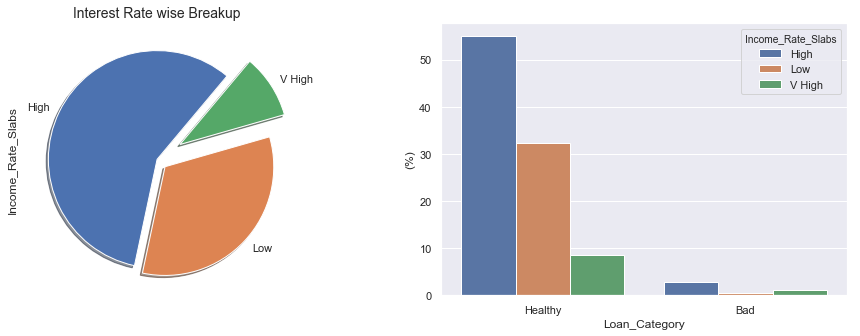

In [283]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Interest Rate wise Breakup", fontsize=14)
data["Income_Rate_Slabs"].value_counts().plot.pie(explode=[0,0.1,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Loan_Category", y="loan_amnt", hue="Income_Rate_Slabs", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

plt.show()

### Analysis by Income Category

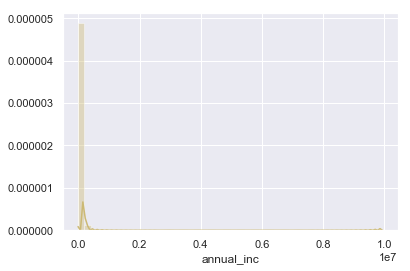

In [237]:
sns.distplot(data['annual_inc'], color='y', label='Ann Income')

In [253]:
def get_income_cat(annual_inc):
    if annual_inc < 50000 :
        return 'Poor'
    elif annual_inc > 100000:
        return 'Rich'
    else :
        return 'Medium'
        
data["Income_Category"] = data['annual_inc'].apply(get_income_cat)

In [254]:
data["Income_Category"].value_counts()

Medium    100801
Poor       57643
Rich       41555
Name: Income_Category, dtype: int64

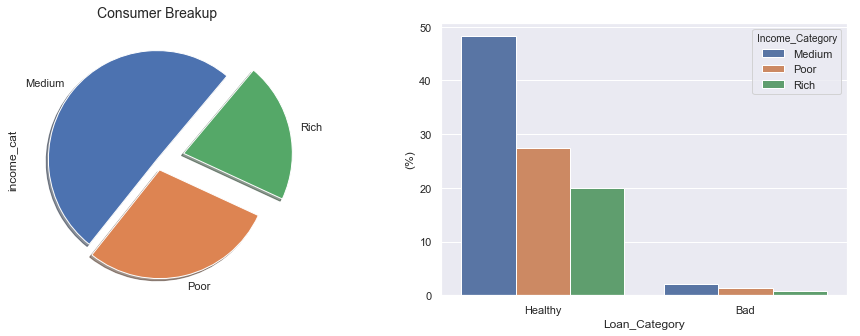

In [255]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
labels ="Medium", "Poor", "Rich"

ax[0].set_title("Consumer Breakup", fontsize=14)
data["income_cat"].value_counts().plot.pie(explode=[0,0.1,0.25],labels=labels, shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Loan_Category", y="loan_amnt", hue="Income_Category", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

plt.show()

### Analysis by Geography

In [263]:
# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']


def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


data['region'] = data['addr_state'].apply(finding_regions)

In [264]:
data["region"].value_counts()

SouthEast    49670
NorthEast    45756
West         44664
MidWest      35372
SouthWest    24537
Name: region, dtype: int64

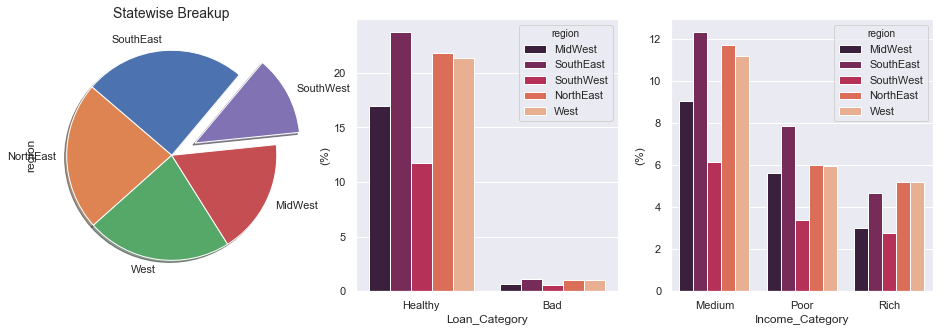

In [277]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

ax[0].set_title("Statewise Breakup", fontsize=14)
data["region"].value_counts().plot.pie(explode=[0,0,0,0,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Loan_Category", y="loan_amnt", hue="region", ax=ax[1], palette = 'rocket', data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

sns.barplot(x="Income_Category", y="loan_amnt", hue="region", ax=ax[2], palette = 'rocket', data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[2].set(ylabel="(%)")

plt.show()

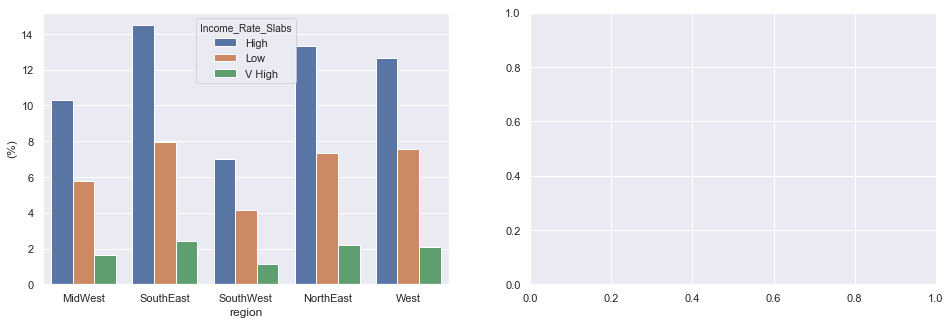

In [288]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

sns.barplot(x="region", y="loan_amnt", ax=ax[0], hue="Income_Rate_Slabs", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[0].set(ylabel="(%)")

plt.show()

### Analysis by Employment Age

In [ ]:
def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


data['region'] = data['addr_state'].apply(finding_regions)